In [5]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ajout du chemin vers src
sys.path.append(os.path.abspath('..'))

from src.data_loader import DataLoader
from src.risk_factors import PortfolioMetrics
from src.var_modules import RiskCalculator

%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
# 1. Configuration
TICKERS = ['AAPL', 'JPM', 'XOM', 'TLT']
WEIGHTS = [0.4, 0.2, 0.2, 0.2]
loader = DataLoader(TICKERS, "2020-01-01", "2025-12-31")
data = loader.get_data()
returns = loader.calculate_returns(data)

# 2. Initialisation des moteurs de calcul
metrics = PortfolioMetrics(returns, WEIGHTS)
calculator = RiskCalculator(metrics)

# 3. Calculs VaR / CVaR (95% confiance)
conf = 0.95
var_p, cvar_p = calculator.parametric_var_cvar(conf)
var_h, cvar_h = calculator.historical_var_cvar(conf)

print(f"--- RÉSULTATS (Confiance {conf:.0%}) ---")
print(f"Paramétrique : VaR = {var_p:.2%} | CVaR = {cvar_p:.2%}")
print(f"Historique   : VaR = {var_h:.2%} | CVaR = {cvar_h:.2%}")

Chargement des données pour ['AAPL', 'JPM', 'XOM', 'TLT']...


[*********************100%***********************]  4 of 4 completed

--- RÉSULTATS (Confiance 95%) ---
Paramétrique : VaR = 1.99% | CVaR = 2.51%
Historique   : VaR = 1.73% | CVaR = 2.93%


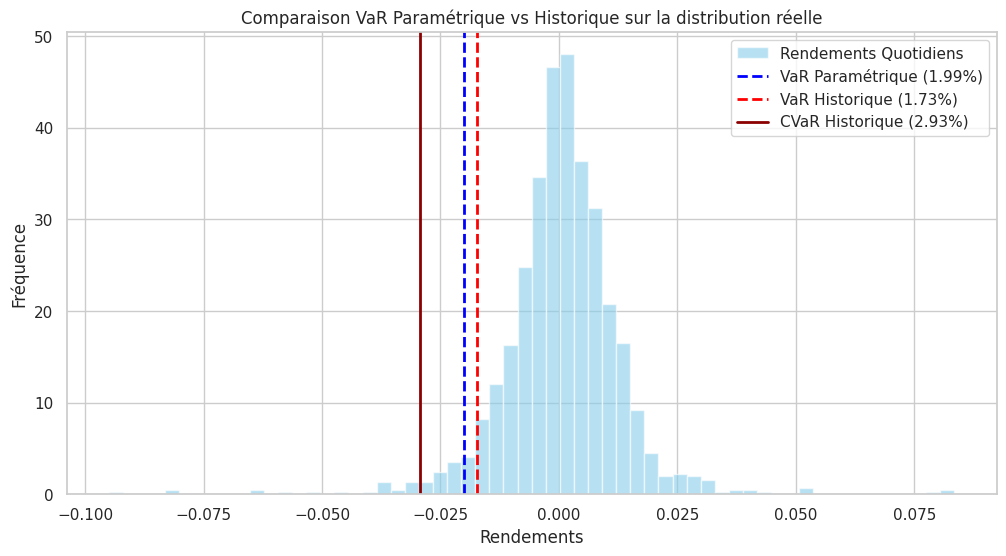

In [7]:
# Récupération des rendements pondérés du portefeuille
weighted_returns = metrics.get_weighted_returns()

plt.figure(figsize=(12, 6))

# Histogramme des rendements réels
plt.hist(weighted_returns, bins=60, alpha=0.6, color='skyblue', label='Rendements Quotidiens', density=True)

# Lignes verticales pour la VaR
plt.axvline(-var_p, color='blue', linestyle='--', linewidth=2, label=f'VaR Paramétrique ({var_p:.2%})')
plt.axvline(-var_h, color='red', linestyle='--', linewidth=2, label=f'VaR Historique ({var_h:.2%})')

# Lignes pour la CVaR (pour montrer la moyenne des pertes extrêmes)
plt.axvline(-cvar_h, color='darkred', linestyle='-', linewidth=2, label=f'CVaR Historique ({cvar_h:.2%})')

plt.title("Comparaison VaR Paramétrique vs Historique sur la distribution réelle")
plt.xlabel("Rendements")
plt.ylabel("Fréquence")
plt.legend()
plt.show()